In [ ]:
pip install turicreate

In [4]:
import turicreate as tc

In [5]:
image_train = tc.SFrame('/content/drive/My Drive/image_train_data/')
image_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [6]:
knn_model = tc.nearest_neighbors.create(image_train,features = ['deep_features'],label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

,SArray
0,

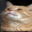

In [7]:
cat = image_train[18:19]
cat['image'].explore()

In [8]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 22.477ms     |

| Done         |         | 100         | 266.152ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [9]:
def image_retrieval(query_results):
  return image_train.filter_by(query_results['reference_label'],'id')


In [10]:
cat_neighbors = image_retrieval(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 15.734ms     |

| Done         |         | 100         | 253.969ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

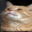
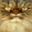
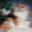
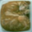
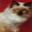

In [11]:
cat_neighbors['image'].explore()

In [12]:
show_neighbors = lambda i : image_retrieval(knn_model.query(image_train[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 21.21ms      |

| Done         |         | 100         | 243.517ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

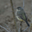
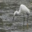
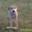
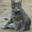
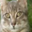

In [13]:
show_neighbors(745)

In [14]:
sketch = tc.Sketch(image_train['label'])
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [15]:
image_train_dog = image_train[image_train['label'] == 'dog']


In [16]:
image_train_dog

id,image,label,deep_features,image_array
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
177,Height: 32 Width: 32,dog,"[0.0, 1.4596567153930664,0.0, 0.4229923486709595, ...","[55.0, 75.0, 42.0, 51.0,76.0, 37.0, 57.0, 83.0, ..."
424,Height: 32 Width: 32,dog,"[0.9423996806144714, 0.0,0.22035276889801025, ...","[60.0, 35.0, 18.0, 63.0,49.0, 38.0, 66.0, 56.0, ..."
462,Height: 32 Width: 32,dog,"[1.4346256256103516, 0.0,0.0, 0.0, 0.0, 0.0, ...","[86.0, 69.0, 75.0, 57.0,41.0, 48.0, 46.0, 35.0, ..."
542,Height: 32 Width: 32,dog,"[0.4515470862388611, 0.0,0.0, 0.0, 0.0, 0.0, ...","[196.0, 174.0, 113.0,140.0, 117.0, 65.0, 8 ..."
573,Height: 32 Width: 32,dog,"[0.5923609733581543, 0.0,0.0, 0.0, 0.0, 0.0, ...","[153.0, 103.0, 52.0,151.0, 102.0, 49.0, ..."
851,Height: 32 Width: 32,dog,"[0.690123438835144, 0.0,0.0, 0.0, ...","[39.0, 6.0, 4.0, 53.0,23.0, 24.0, 57.0, 37.0, ..."
919,Height: 32 Width: 32,dog,"[0.0,0.17755866050720215, ...","[29.0, 43.0, 4.0, 24.0,35.0, 6.0, 24.0, 37.0, ..."
1172,Height: 32 Width: 32,dog,"[0.517601490020752, 0.0,1.9641833305358887, 0.0, ...","[182.0, 180.0, 197.0,196.0, 192.0, 209.0, ..."


In [17]:
dog_model = tc.nearest_neighbors.create(image_train_dog,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [18]:
image_test = tc.SFrame('/content/drive/My Drive/image_test_data/')

,SArray
0,

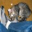

In [19]:
cat_image = image_test[0:1]
cat_image['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 25.838ms     |

| Done         |         | 100         | 92.4ms       |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

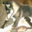
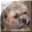
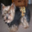
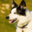
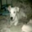

In [21]:
image_retrieval(dog_model.query(cat_image))['image'].explore()


In [22]:
image_train_cat = image_train[image_train['label'] == 'cat']
image_train_cat

id,image,label,deep_features,image_array
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
159,Height: 32 Width: 32,cat,"[0.0, 0.0, 0.0,0.6432753205299377, 0.0, ...","[154.0, 145.0, 135.0,152.0, 144.0, 135.0, ..."
331,Height: 32 Width: 32,cat,"[0.0, 0.0,0.5109639167785645, 0.0, ...","[45.0, 65.0, 92.0, 72.0,95.0, 110.0, 106.0, ..."
367,Height: 32 Width: 32,cat,"[1.3865805864334106, 0.0,0.0, 0.0, 0.0, ...","[168.0, 151.0, 143.0,145.0, 130.0, 124.0, ..."
384,Height: 32 Width: 32,cat,"[1.0440353155136108, 0.0,0.0, 0.0, 0.0, 0.0, ...","[46.0, 45.0, 50.0, 47.0,45.0, 51.0, 45.0, 44.0, ..."
494,Height: 32 Width: 32,cat,"[0.0, 0.0539512038230896,1.9574512243270874, 0.0, ...","[26.0, 34.0, 29.0, 24.0,29.0, 25.0, 33.0, 43.0, ..."
597,Height: 32 Width: 32,cat,"[0.0, 0.0,0.04706370830535889, ...","[133.0, 153.0, 138.0,126.0, 146.0, 136.0, ..."
788,Height: 32 Width: 32,cat,"[0.5058419108390808, 0.0,0.0, 0.0, ...","[184.0, 200.0, 197.0,189.0, 203.0, 200.0, ..."
882,Height: 32 Width: 32,cat,"[0.0, 0.0,0.15620028972625732, ...","[141.0, 133.0, 112.0,143.0, 133.0, 113.0, ..."


In [23]:
cat_model = tc.nearest_neighbors.create(image_train_cat,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 17.775ms     |

| Done         |         | 100         | 81.159ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

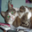
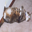
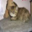
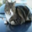
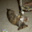

In [24]:
image_retrieval(cat_model.query(cat_image))['image'].explore()
